# Diet Data Editor

## Import Table from SQL

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sql_connection = sqlite3.connect('diet.sqlite')
# Import desired table and set the index to id.
current_foods = pd.read_sql('SELECT * FROM may_2023', sql_connection, index_col='index')
current_foods.tail()

,food_id,date,meal_number,food_name,servings,carbs,fats,protein,calories
index,,,,,,,,,
216,1000218,2023-05-30 00:00:00,3,Protein Powder,2.0,3.0,2.0,24,120
217,1000219,2023-05-30 00:00:00,3,Spicy Garlic,1.0,3.0,6.0,1,70
218,1000220,2023-05-30 00:00:00,3,Fruit Snacks,1.0,17.0,0.0,1,70
219,1000221,2023-05-30 00:00:00,4,Protein Powder,2.0,3.0,2.0,24,120
220,1000222,2023-05-30 00:00:00,4,Steak Ques.,1.0,42.0,27.0,26,520


## Food Inserts List

In [2]:
# Set the current meal number to be logged
day_of_month = input("Enter the day of the month: DD")
date = f"2023-05-{day_of_month} 00:00:00"
choice = 1

while choice != 2:

    """ This algorithm takes a desired food input and then inserts it into a SQL query to retrieve the nutritional info for that food. The meal number and serving count are updated and then the entry is inserted into the dataframe. """

    db_food = input("What food would you like too add?")
    new_food = pd.read_sql("SELECT food_name, carbs, fats, protein, calories"
                            " FROM food_list "
                            " WHERE food_name = (?)", sql_connection, params=(db_food,))
    meal_number = int(input("Enter Meal Number: "))
    servings = float(input("Enter Serving Count: "))
    f_id = current_foods.iloc[-1, 0] + 1
    new_entry = [f_id,
                 date,
                 meal_number,
                 new_food.loc[0,'food_name'],
                 servings,
                 new_food.loc[0,'carbs'],
                 new_food.loc[0,'fats'],
                 new_food.loc[0,'protein'],
                 new_food.loc[0,'calories']]
    current_foods.loc[len(current_foods)] = new_entry
    choice = int(input("Add another? [1]Yes [2]No"))

current_foods['date'] = pd.to_datetime(current_foods['date'])
updated_foods = current_foods
updated_foods.tail()

0           Oatmeal
1    Protein Powder
2       Coco Powder
3             Ramen
4        Cereal Bar
Name: food_name, dtype: object

## Data Manipulation

In [ ]:
# Update item(s) by id and column
# current_foods.loc[:,'date'] = "2023-05-27 00:00:00"

# Drop operation
# current_foods.drop(index=current_foods.index[-1], axis=0, inplace=True) # Remove last entry

updated_foods.tail()

## Update SQL

In [4]:
updated_foods.dtypes

NameError: name 'updated_foods' is not defined

In [4]:
# Export new chart to database with a date stamp
updated_foods.to_sql('may_2023', sql_connection, if_exists='replace')

# TODO: MANUALLY REVIEW SQL AND EXPORT NEW TABLE TO CSV AS BACKUP!!

food_id                 int64
date           datetime64[ns]
meal_number             int64
food_name              object
servings              float64
carbs                 float64
fats                  float64
protein                 int64
calories                int64
dtype: object

## Today's Data

In [5]:
# Sort entries by date
mask = updated_foods['date'] == '2023-05-30 00:00:00'
today = updated_foods[mask]
today

,food_id,date,meal_number,food_name,servings,carbs,fats,protein,calories
index,,,,,,,,,
211,1000213,2023-05-30,1,Ramen,1.0,54.0,14.0,8,370
212,1000214,2023-05-30,1,Protein Powder,2.0,3.0,2.0,24,120
213,1000215,2023-05-30,2,Pop Tart,1.0,74.0,9.0,3,390
214,1000216,2023-05-30,2,Eggs,4.0,0.0,5.0,6,70
215,1000217,2023-05-30,3,Rice,2.0,45.0,1.0,4,206
216,1000218,2023-05-30,3,Protein Powder,2.0,3.0,2.0,24,120
217,1000219,2023-05-30,3,Spicy Garlic,1.0,3.0,6.0,1,70
218,1000220,2023-05-30,3,Fruit Snacks,1.0,17.0,0.0,1,70


## Macro Calculations and Visualizations

In [6]:
# Calculate macronutrient totals based on serving count
total_carbs = int((today['carbs'] * today['servings']).sum())
total_fats = int((today['fats'] * today['servings']).sum())
total_protein = int((today['protein'] * today['servings']).sum())
total_cals = int((today['calories'] * today['servings']).sum())

print(f"Carbs: {total_carbs} | Goals: 500 400 300")
print(f"Fats: {total_fats} | Goals: 100 75 50")
print(f"Protein: {total_protein} | Goal: 200")
print(f"Calories: {total_cals}")

Carbs: 250 | Goals: 500 400 300
Fats: 59 | Goals: 100 75 50
Protein: 141 | Goal: 200
Calories: 2072


In [7]:
# Calculate the number of calories from each macro nutrient.
carb_cals = total_carbs * 4
fat_cals = total_fats * 9
protein_cals = total_protein * 4

print(f"Calories Form Carbs: {carb_cals}")
print(f"Calories Form Fats: {fat_cals}")
print(f"Calories Form Protein: {protein_cals}")

Carbs: 298 | Goals: 500 400 300
Fats: 90 | Goals: 100 75 50
Protein: 215 | Goal: 200
Calories: 2832


In [8]:
# Plot as a pie chart
macro_series = pd.Series(
    [carb_cals, fat_cals, protein_cals],
    index=['Carbs', 'Fats', 'Protein'],
    name="Macro Breakdown"
)

macro_series.plot.pie(
    colors=sns.color_palette('colorblind'),
    autopct='%1.0f%%',
    fontsize=17,
    shadow=True,
    explode=(0.04,0.04,0.04),
    figsize=(5,5)
)

Calories Form Carbs: 1192
Calories Form Fats: 810
Calories Form Protein: 860


<Axes: ylabel='Macro Breakdown'>

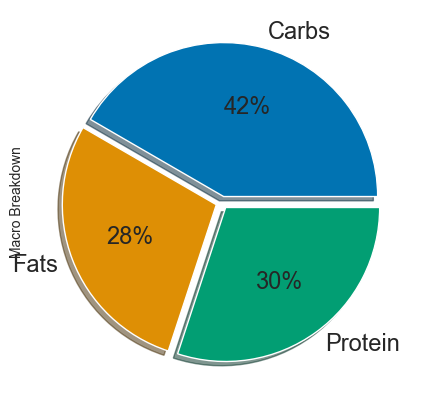

In [9]:
# Add a total calories column
today.loc[:,'total_food_cals'] = today['servings'] * today['calories'] # Combine columns
today

In [11]:
# Calories per meal
# Aggregate rows with the same meal number
cals_per_meal = today.groupby(today['meal_number']).aggregate({'total_food_cals': 'sum'})
cals_per_meal

,food_id,date,meal_number,food_name,servings,carbs,fats,protein,calories,total_food_cals
index,,,,,,,,,,
211,1000213,2023-05-30,1,Ramen,1.0,54.0,14.0,8,370,370.0
212,1000214,2023-05-30,1,Protein Powder,2.0,3.0,2.0,24,120,240.0
213,1000215,2023-05-30,2,Pop Tart,1.0,74.0,9.0,3,390,390.0
214,1000216,2023-05-30,2,Eggs,4.0,0.0,5.0,6,70,280.0
215,1000217,2023-05-30,3,Rice,2.0,45.0,1.0,4,206,412.0
216,1000218,2023-05-30,3,Protein Powder,2.0,3.0,2.0,24,120,240.0
217,1000219,2023-05-30,3,Spicy Garlic,1.0,3.0,6.0,1,70,70.0
218,1000220,2023-05-30,3,Fruit Snacks,1.0,17.0,0.0,1,70,70.0
219,1000221,2023-05-30,4,Protein Powder,2.0,3.0,2.0,24,120,240.0


NameError: name 'cals_per_meal' is not defined

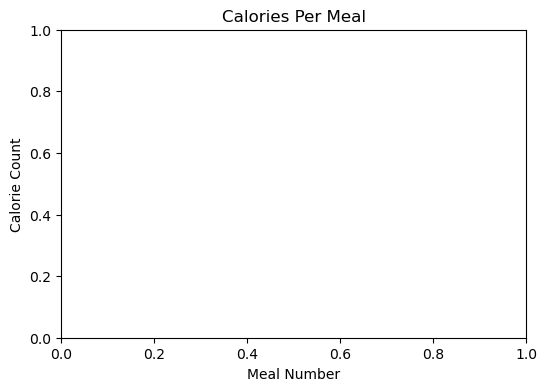

In [3]:
# Plot calories per meal
# Dimensions of the figure frame
plt.figure(figsize=(6,4))
plt.title("Calories Per Meal")
plt.xlabel("Meal Number")
plt.ylabel("Calorie Count")

sns.lineplot(
    data=cals_per_meal,
    legend=False
)

## LOG:
### 2023-05-15: Wine removed from diet
### 2023-05-29: New Cal Goals 500 400 300